In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
print("All dependencies are imported.")

All dependencies are imported.


In [38]:
data = pd.read_csv('Heart_disease.csv')
df = pd.DataFrame(data)

In [39]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [64]:
df.shape

(614, 13)

In [65]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [66]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df_new = df.dropna()

In [68]:
df_new.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [70]:
df_new.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [71]:
df_new['Gender'] = df_new['Gender'].map({'Male': 1, 'Female': 0})

In [72]:
df_new.Married.unique()

array(['Yes', 'No'], dtype=object)

In [73]:
df_new['Married'] = df_new['Married'].map({'Yes': 1, 'No': 0})

In [74]:
df_new.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [75]:
df_new['Dependents'] = df_new['Dependents'].map({'1': 1, '0': 0,'2':2,'3+':3})

In [76]:
df_new.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [77]:
df_new['Education'] = df_new['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [78]:
df_new.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [79]:
df_new['Self_Employed'] = df_new['Self_Employed'].map({'Yes': 1, 'No': 0})

In [80]:
df_new.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [81]:
df_new['Property_Area'] = df_new['Property_Area'].map({'Rural': 1, 'Urban': 0,'Semiurban':2})

In [82]:
df_new.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [83]:
df_new['Loan_Status'] = df_new['Loan_Status'].map({'Y': 1, 'N': 0})

In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    int64  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


In [85]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1


In [86]:
#Output variable:
target_variables=df_new.iloc[:,-1]
display(target_variables)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [87]:
y = target_variables

In [91]:
print("----------Input Variables------------")
x=df_new.iloc[:,:-1]
x = df_new.drop(columns='Loan_ID')
display(x)

Y ----------Input Variables------------


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,0,1


In [92]:
print("Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y, random_state=23)
print("Parameters:")
display(LogisticRegression())
lr=LogisticRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy Score:')
print(round(accuracy_score(y_test,y_pred)*100,2))
print('\nPrecision:')
print(round(precision_score(y_test,y_pred)*100,2))
print('\nRecall:')
print(round(recall_score(y_test,y_pred)*100,2))
print('\nF1 Score:')
print(round(f1_score(y_test,y_pred)*100,2))

Model Parameters |  Accuracy Score  | Precision  | Recall  | F1 Score  | Classification Report
Parameters:


LogisticRegression()

Accuracy Score:
99.31

Precision:
99.01

Recall:
100.0

F1 Score:
99.5


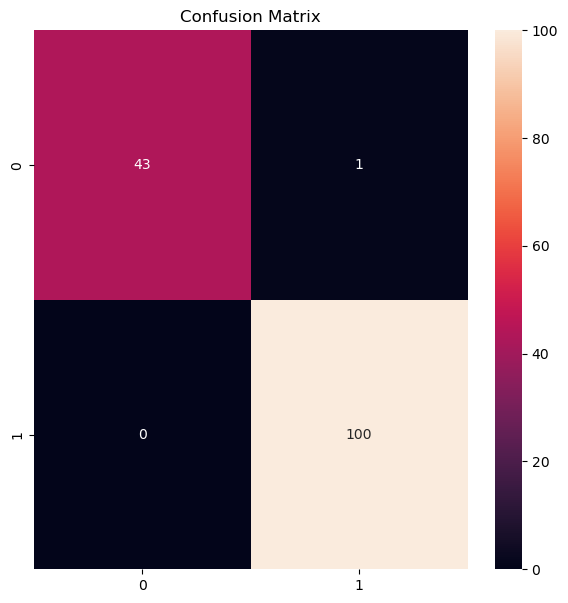

In [93]:
# Ploting confusion matrix
fig=plt.figure(figsize=(7,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()